<a href="https://colab.research.google.com/github/bankadilasha11/MACHINE-LEARNING/blob/master/Loan_Prediction_Problem_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df.shape

(614, 13)

In [0]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [0]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [0]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [0]:
df.dropna(inplace=True)

In [0]:
df.shape

(542, 13)

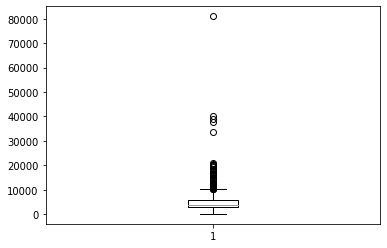

In [0]:
plt.boxplot(df['ApplicantIncome'])
plt.show()

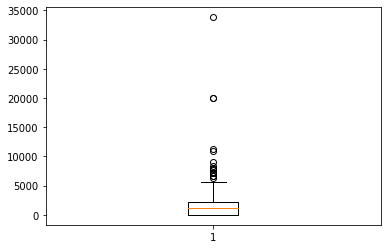

In [0]:
plt.boxplot(df['CoapplicantIncome'])
plt.show()

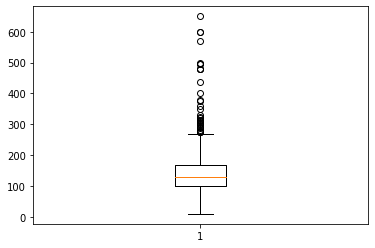

In [0]:
plt.boxplot(df['LoanAmount'])
plt.show()

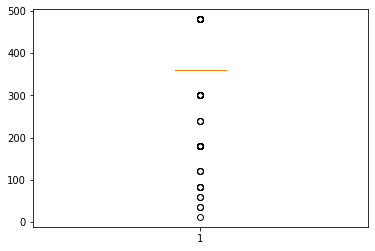

In [0]:
plt.boxplot(df['Loan_Amount_Term'])
plt.show()

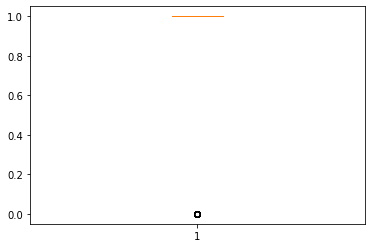

In [0]:
plt.boxplot(df['Credit_History'])
plt.show()

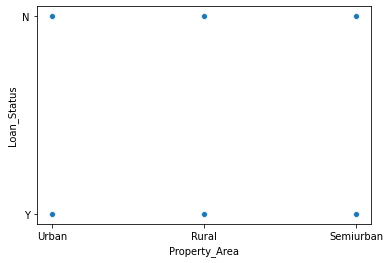

In [0]:
sns.scatterplot(x='Property_Area',y='Loan_Status',data=df)

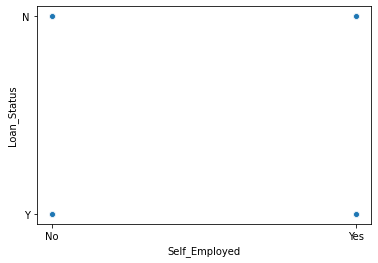

In [0]:
sns.scatterplot(x='Self_Employed',y='Loan_Status',data=df)

In [0]:
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Loan_Status     N    Y
Property_Area         
Rural          61   98
Semiurban      47  162
Urban          58  116


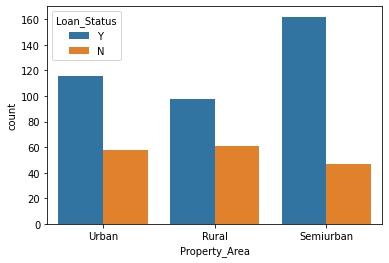

In [0]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

In [0]:
print(pd.crosstab(df['Gender'],df['Loan_Status']))

Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


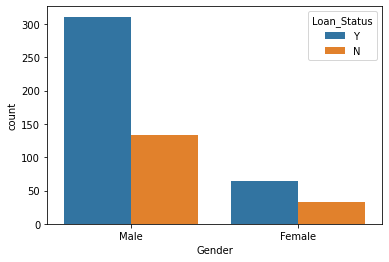

In [0]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])

In [0]:
print(pd.crosstab(df['Married'],df['Loan_Status']))

Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


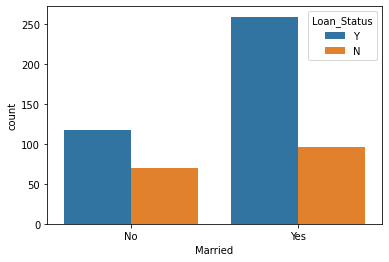

In [0]:
sns.countplot(df['Married'],hue=df['Loan_Status'])

In [0]:
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Loan_Status      N    Y
Self_Employed          
No             141  326
Yes             25   50


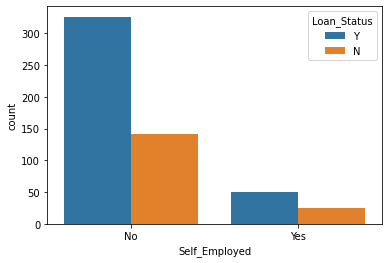

In [0]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

In [0]:
print(pd.crosstab(df['Education'],df['Loan_Status']))

Loan_Status     N    Y
Education             
Graduate      122  303
Not Graduate   44   73


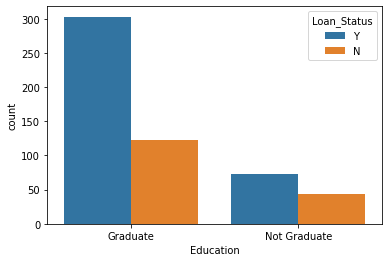

In [0]:
sns.countplot(df['Education'],hue=df['Loan_Status'])

In [0]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

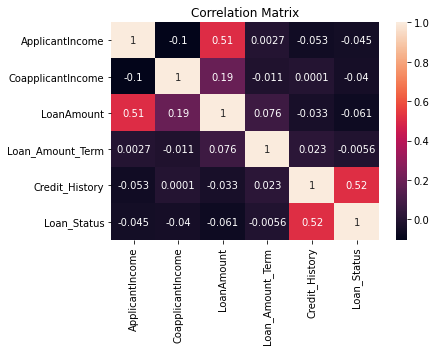

In [0]:
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True)

In [0]:
df2=df.drop(labels=['ApplicantIncome'],axis=1)
df2=df2.drop(labels=['CoapplicantIncome'],axis=1)
df2=df2.drop(labels=['LoanAmount'],axis=1)
df2=df2.drop(labels=['Loan_Amount_Term'],axis=1)
df2=df2.drop(labels=['Loan_ID'],axis=1)

In [0]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,1
1,Male,Yes,1,Graduate,No,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1
4,Male,No,0,Graduate,No,1.0,Urban,1


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()

In [0]:
df2['Property_Area']=le.fit_transform(df2['Property_Area'])

In [0]:
df2['Dependents']=le.fit_transform(df2['Dependents'])

In [0]:
df2=pd.get_dummies(df2)

In [0]:
df2.dtypes

Dependents                  int64
Credit_History            float64
Property_Area               int64
Loan_Status                 int64
Gender_Female               uint8
Gender_Male                 uint8
Married_No                  uint8
Married_Yes                 uint8
Education_Graduate          uint8
Education_Not Graduate      uint8
Self_Employed_No            uint8
Self_Employed_Yes           uint8
dtype: object

In [0]:
df2=df2.drop(labels=['Gender_Female'],axis=1)
df2=df2.drop(labels=['Married_No'],axis=1)
df2=df2.drop(labels=['Education_Not Graduate'],axis=1)
df2=df2.drop(labels=['Self_Employed_No'],axis=1)

In [0]:
df2.head()

,Dependents,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Graduate,Self_Employed_Yes
0,0,1.0,2,1,1,0,1,0
1,1,1.0,0,0,1,1,1,0
2,0,1.0,2,1,1,1,1,1
3,0,1.0,2,1,1,1,0,0
4,0,1.0,2,1,1,0,1,0


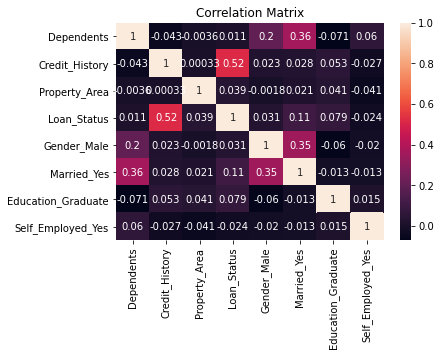

In [0]:
plt.title('Correlation Matrix')
sns.heatmap(df2.corr(),annot=True)

In [0]:
df2=df2.drop('Self_Employed_Yes',1)
df2=df2.drop('Dependents',1)
df2=df2.drop('Education_Graduate',1)

In [0]:
df2.head()

,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes
0,1.0,2,1,1,0
1,1.0,0,0,1,1
2,1.0,2,1,1,1
3,1.0,2,1,1,1
4,1.0,2,1,1,0


In [0]:
X=df2.drop('Loan_Status',1)

In [0]:
Y=df2['Loan_Status']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=6)

In [0]:
print('Shape of X_train is: ',x_train.shape)
print('Shape of X_test is: ',x_test.shape)
print('Shape of Y_train is: ',y_train.shape)
print('Shape of y_test is: ',y_test.shape)

Shape of X_train is:  (433, 4)
Shape of X_test is:  (109, 4)
Shape of Y_train is:  (433,)
Shape of y_test is:  (109,)


In [0]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [0]:
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
log.score(x_train,y_train)

0.7944572748267898

In [0]:
#Predicting trest dataset
pred=log.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_test,pred)

0.8440366972477065

In [0]:
from sklearn import metrics

In [0]:
metrics.confusion_matrix(y_test,pred)

array([[23, 16],
       [ 1, 69]])

In [0]:
#From confusion matrix we can observe that

#True positive value= 23
#True negative value=1
#False negative=16
#False positive=69

In [0]:
metrics.recall_score(y_test,pred)

0.9857142857142858

In [0]:
metrics.precision_score(y_test,pred)

0.8117647058823529

In [0]:
metrics.f1_score(y_test,pred)

0.8903225806451613

In [0]:
data={'y_test':y_test,'pred':pred}
pd.DataFrame(data=data)

,y_test,pred
572,1,1
133,1,1
371,1,1
487,0,1
277,1,1
...,...,...
457,0,1
310,1,1
553,0,0
186,0,0
